## About this Dataset: 

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Interesting Task Ideas:

* Understanding what content is available in different countries
* Identifying similar content by matching text-based features
* Network analysis of Actors / Directors and find interesting insights
* Does Netflix has more focus on TV Shows than movies in recent years.

### Link: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Data reading
data = pd.read_csv('netflix_titles.csv', parse_dates=['date_added'])
df = data.copy()

## EDA

In [3]:
# Data overview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Duplicated rows count
df.duplicated().sum()

0

In [5]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [6]:
# Missing values count
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Too much rows with unknown director. Replace this values to "Unknown" and drop other values.
df.director.fillna('Unknown', inplace=True)
df = df.dropna()

In [8]:
# Rows number after dropping missing values
df.shape[0]

7290

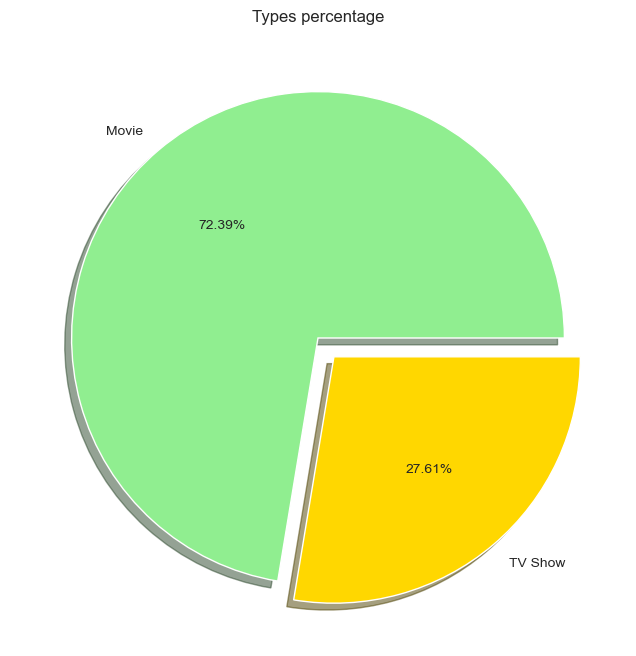

In [9]:
# Types percentage piechart
plt.figure(figsize = (8,8))
df.type.value_counts().plot.pie(autopct='%1.2f%%', shadow = True, explode = [0,0.1], colors = ['lightgreen','gold'])
plt.title('Types percentage')
plt.ylabel('')
plt.show()

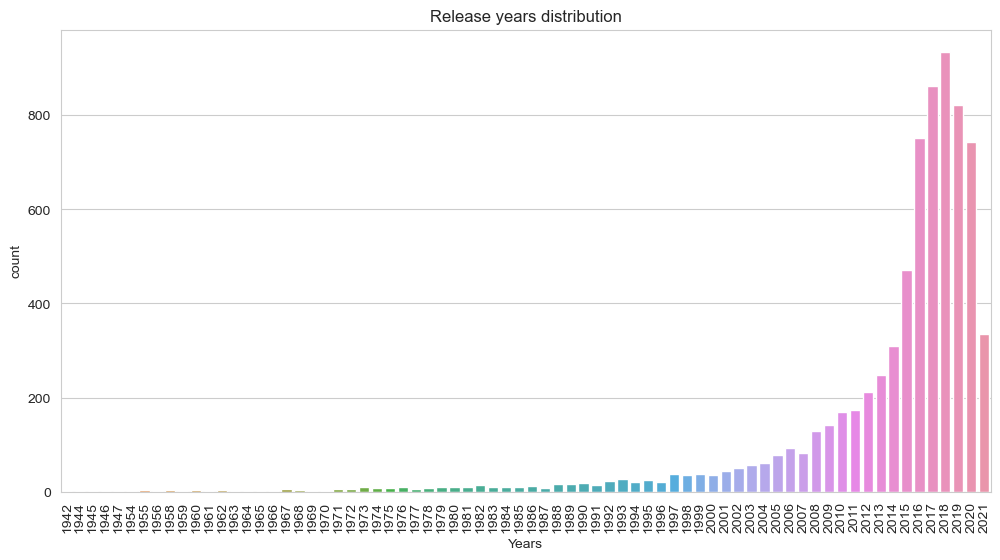

In [10]:
# Release years distribution
plt.figure(figsize = (12,6))
sns.countplot(x = df.release_year)
plt.xlabel('Years')
plt.xticks(rotation = 90)
plt.title('Release years distribution')
plt.show()

In [11]:
countries_tv = df[df['type'] == 'TV Show'].country.to_list()
dct = {}
for c in countries_tv:
    c = list(c.split(','))
    for i in c:
        if i in list(dct.keys()):
            dct[i] += 1
        else:
            dct[i] = 1

top_countries_tv = dict(sorted(dct.items(), key=lambda x: dct[x[0]], reverse = True)[:20])
top_countries_tv = top_countries_tv
top_countries_tv = pd.DataFrame({'country':top_countries_tv.keys(), 'amount':top_countries_tv.values()})

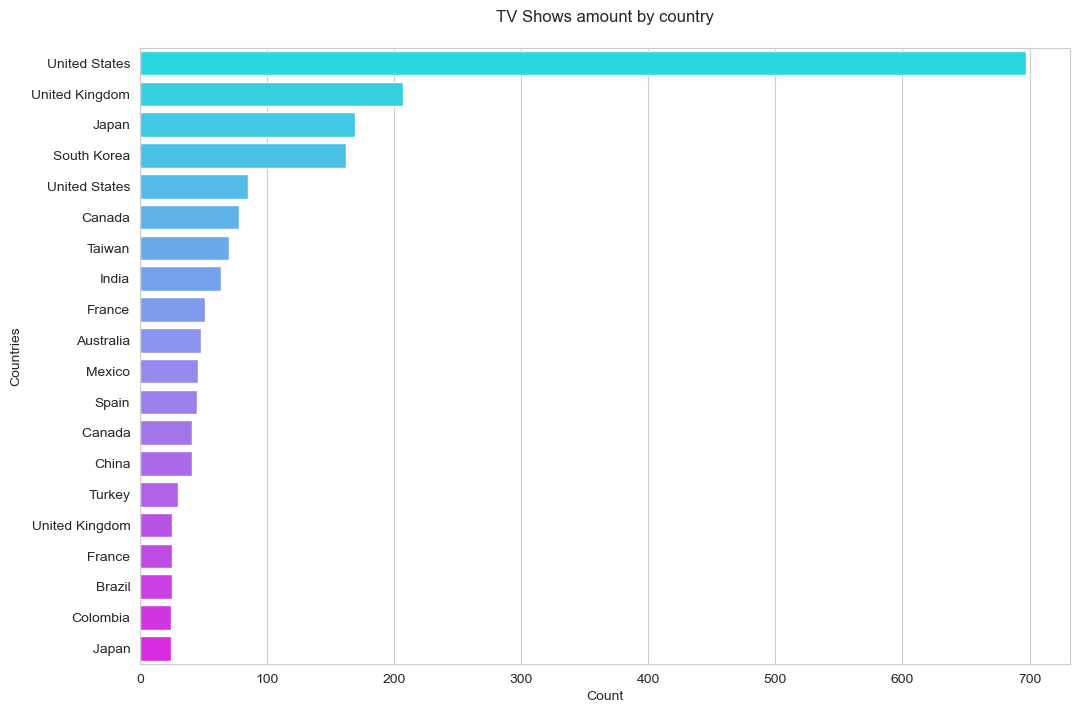

In [12]:
# Countries filming TV Shows
plt.figure(figsize=(12,8))
sns.barplot(y = top_countries_tv.country,x = top_countries_tv.amount, palette='cool')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('TV Shows amount by country\n')
plt.show()

In [13]:
countries_mov = df[df['type'] == 'Movie'].country.to_list()
dct = {}
for c in countries_mov:
    c = list(c.split(','))
    for i in c:
        if i in list(dct.keys()):
            dct[i] += 1
        else:
            dct[i] = 1
            
top_countries_mov = dict(sorted(dct.items(), key=lambda x: dct[x[0]], reverse = True)[:20])
top_countries_mov = pd.DataFrame({'country':top_countries_mov.keys(), 'amount':top_countries_mov.values()})

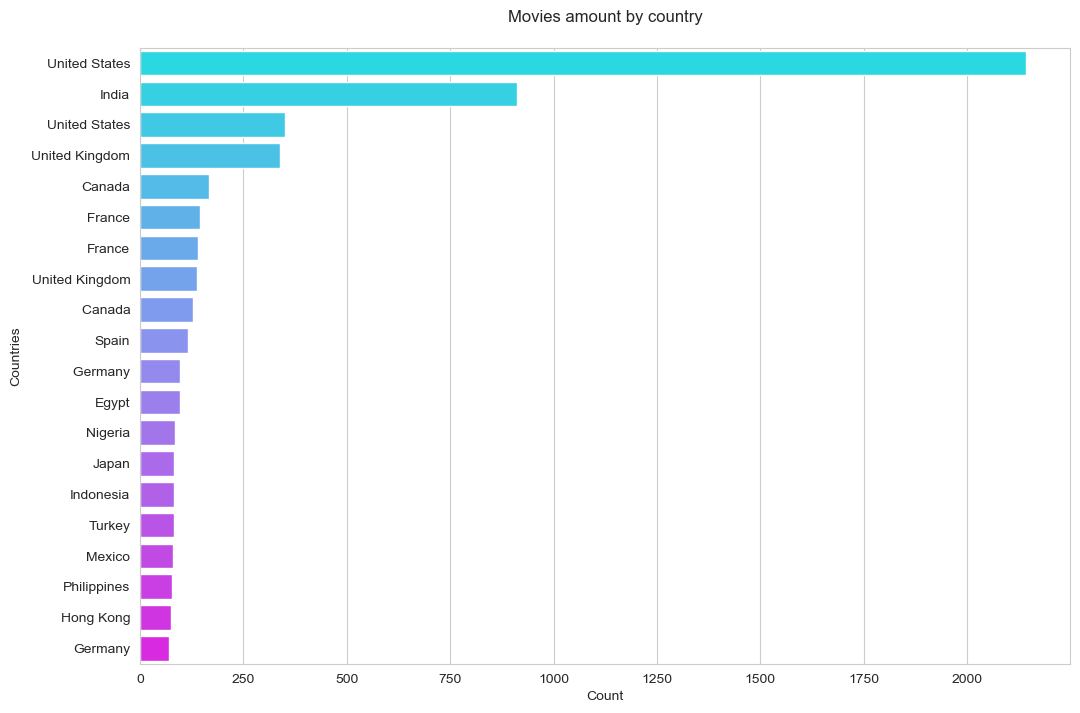

In [14]:
# Countries filming Movies
plt.figure(figsize=(12,8))
sns.barplot(y = top_countries_mov.country,x = top_countries_mov.amount, palette='cool')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.title('Movies amount by country\n')
plt.show()

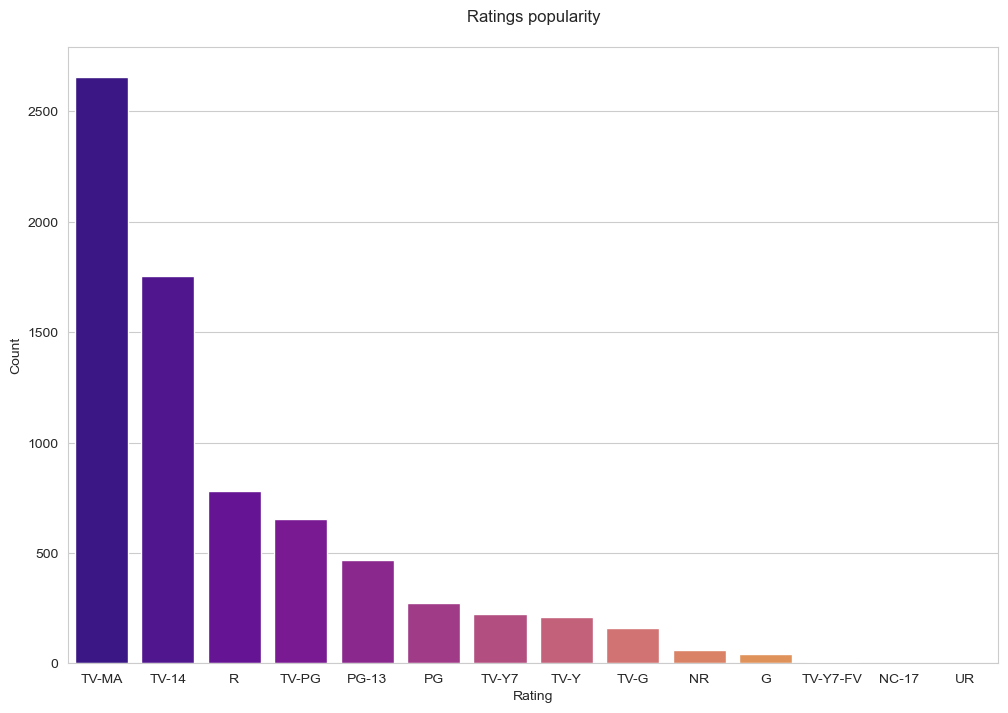

In [15]:
# Ratings popularity
order = list(df.rating.value_counts().index)
plt.figure(figsize=(12,8))
sns.countplot(x = df.rating, palette='plasma', order=order)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings popularity\n')
plt.show()

In [16]:
genres = df.listed_in.to_list()
dct = {}
for c in genres:
    c = list(c.split(', '))
    for i in c:
        if i in list(dct.keys()):
            dct[i] += 1
        else:
            dct[i] = 1
            
top_genres = dict(sorted(dct.items(), key=lambda x: dct[x[0]], reverse = True)[:20])
top_genres = pd.DataFrame({'name':top_genres.keys(), 'amount':top_genres.values()})

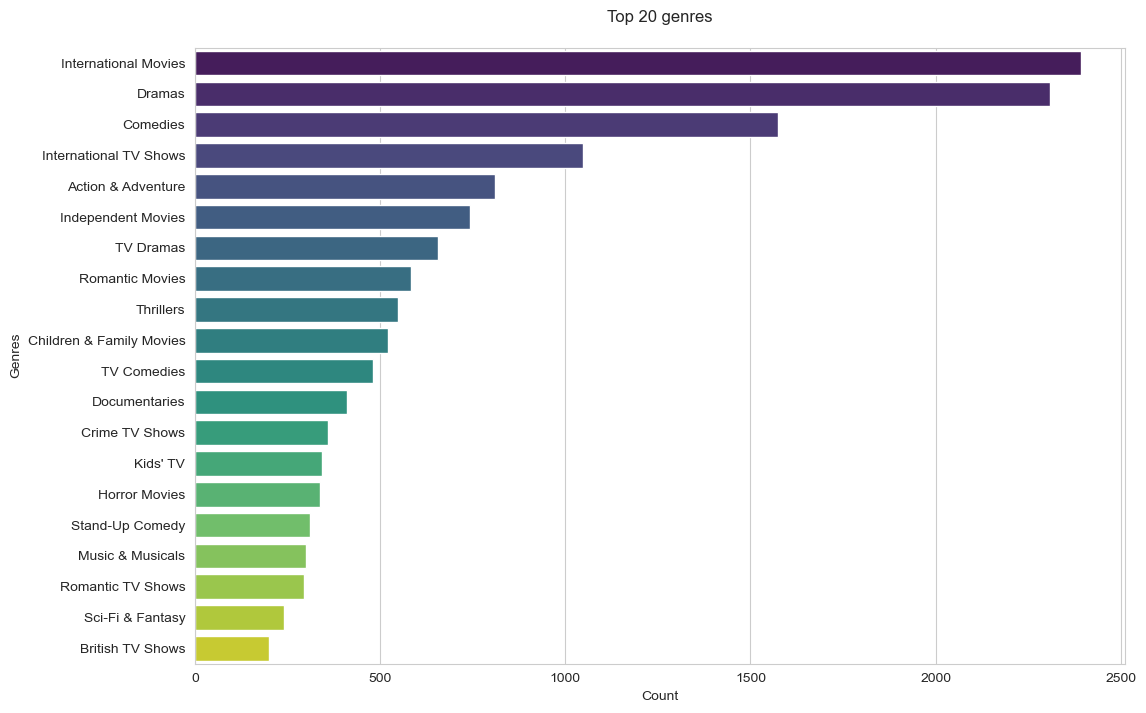

In [17]:
# Top 20 genres
plt.figure(figsize=(12,8))
sns.barplot(y = top_genres.name, x = top_genres.amount, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top 20 genres\n')
plt.show()

In [18]:
actors = df.cast.to_list()
dct = {}
for c in actors:
    c = list(c.split(', '))
    for i in c:
        if i in list(dct.keys()):
            dct[i] += 1
        else:
            dct[i] = 1
            
popular_actors = dict(sorted(dct.items(), key=lambda x: dct[x[0]], reverse = True)[:20])
popular_actors = pd.DataFrame({'name':popular_actors.keys(), 'amount':popular_actors.values()})

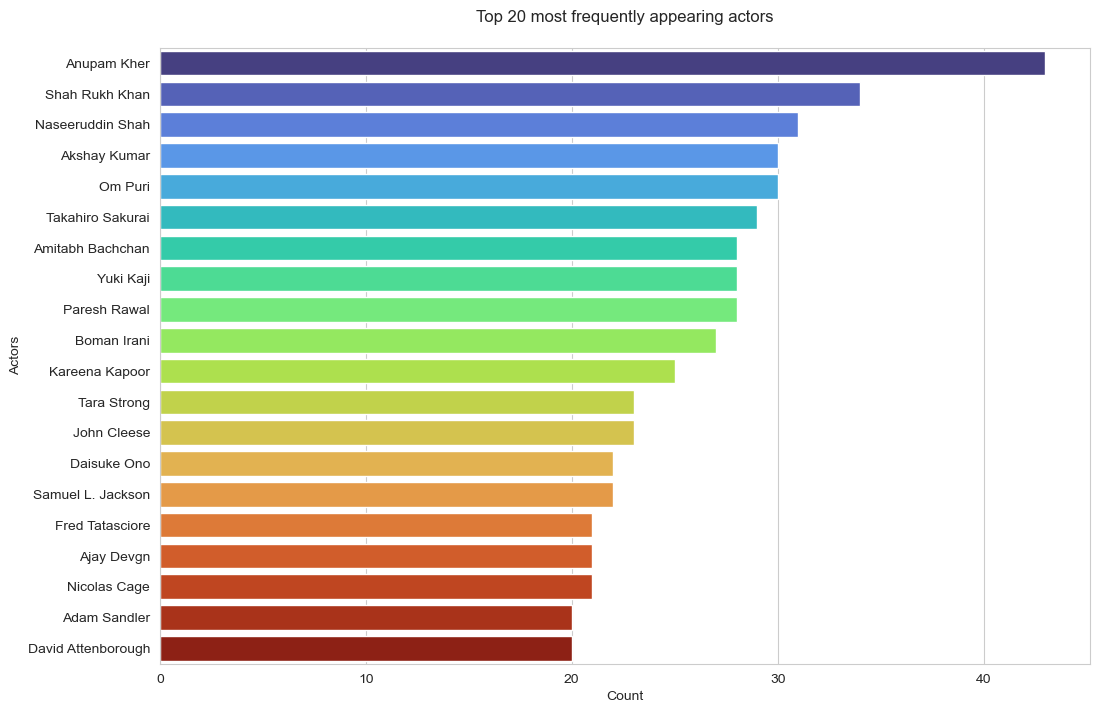

In [19]:
# Top 20 most frequently appearing actors
plt.figure(figsize=(12,8))
sns.barplot(y = popular_actors.name, x = popular_actors.amount, palette='turbo')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.title('Top 20 most frequently appearing actors\n')
plt.show()

In [20]:
directors = df.director.value_counts()[:20]
directors = pd.DataFrame(directors).reset_index().rename(columns={'index':'name', 'director':'amount'})
directors = directors[directors['name'] != 'Unknown']

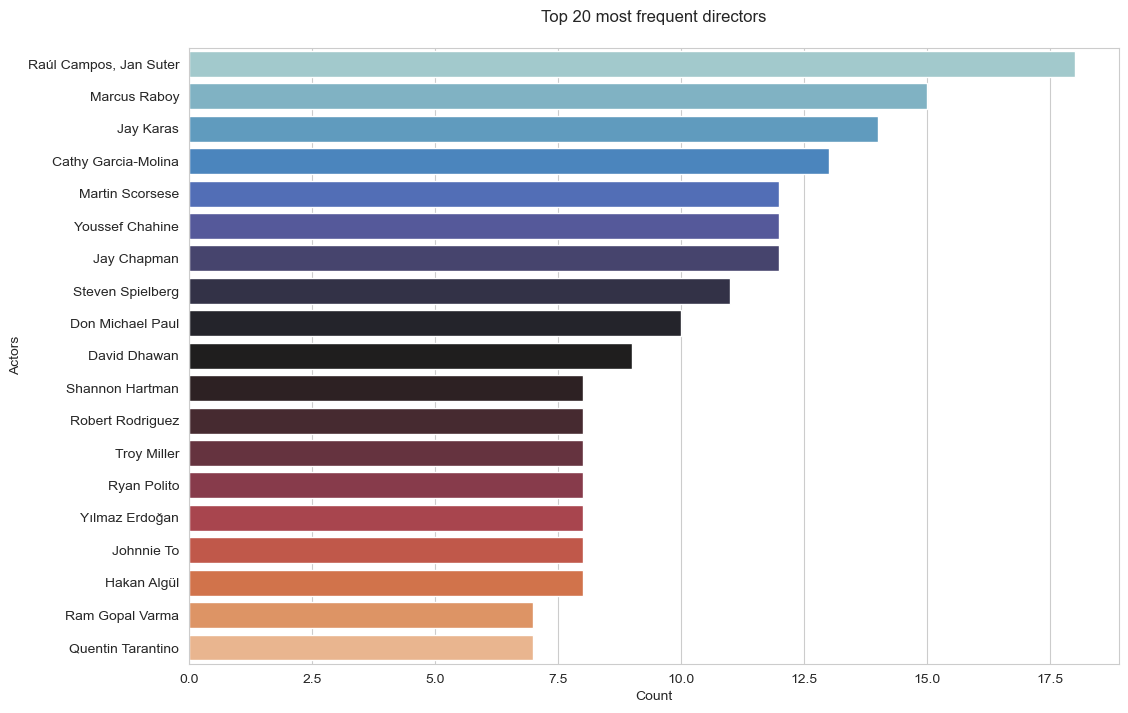

In [21]:
# Top 20 most frequent directors
plt.figure(figsize=(12,8))
sns.barplot(y = directors.name, x = directors.amount, palette='icefire')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.title('Top 20 most frequent directors\n')
plt.show()

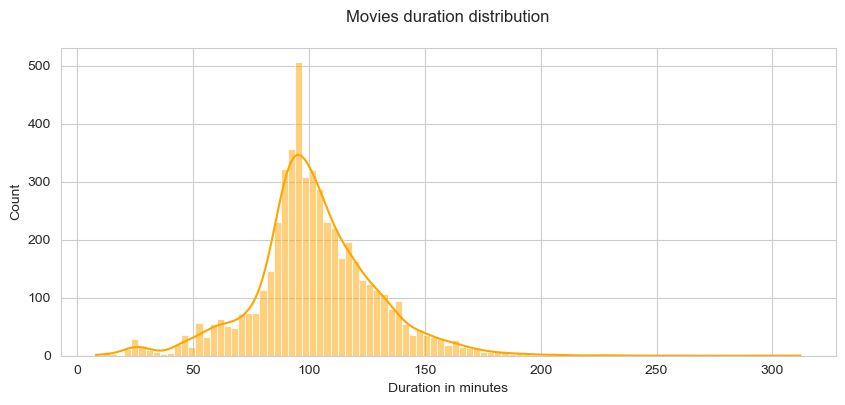

In [22]:
# Movies duration distribution
movies_len = df[df['type'] == 'Movie'].duration.apply(lambda x: x.split(' ')[0]).astype('int')
plt.figure(figsize = (10,4))
sns.histplot(movies_len, color = "orange", kde=True)
plt.title('Movies duration distribution\n')
plt.xlabel('Duration in minutes')
plt.show()

In [23]:
tv_shows_len = df[df['type'] != 'Movie'].duration.apply(lambda x: x.split(' ')[0]).astype('int')

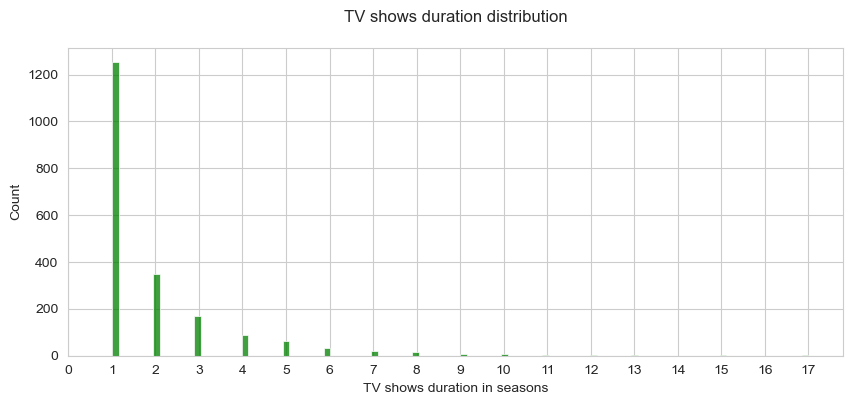

In [24]:
plt.figure(figsize = (10,4))
sns.histplot(tv_shows_len, color = "green")
plt.title('TV shows duration distribution\n')
plt.xlabel('TV shows duration in seasons')
plt.xticks(range(18))
plt.show()

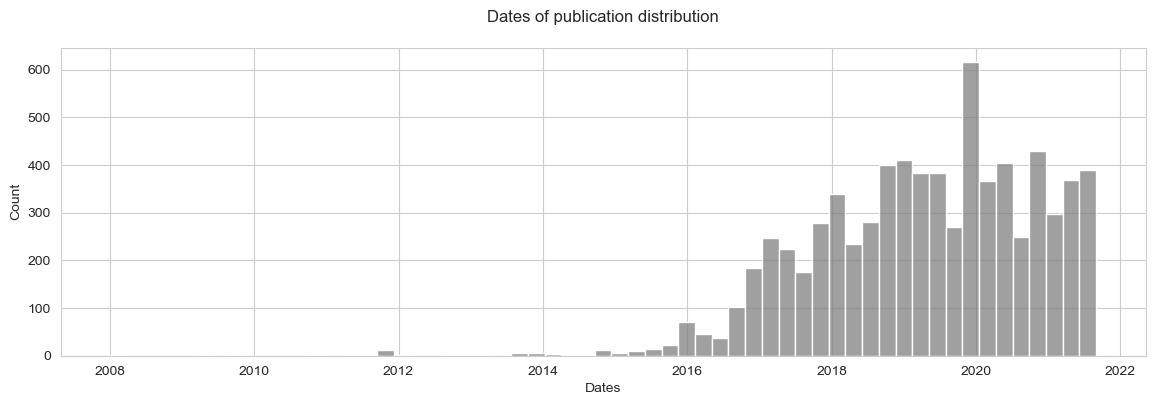

In [25]:
months = pd.to_datetime(df.date_added.astype('str').apply(lambda x: x[:-3]))
plt.figure(figsize = (14,4))
sns.histplot(months, color='grey')
plt.xlabel('Dates')
plt.title('Dates of publication distribution\n')
plt.show()

## Recommendation system based on film description

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df.description)

print(f'Rows count:{tfidf_matrix.shape[0]}')
print(f'Words count:{tfidf_matrix.shape[1]}')

Rows count:7290
Words count:17150


In [28]:
# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(7290, 7290)

In [29]:
indices = pd.Series(df.index, index=df.title)

In [30]:
# Adding film titles to columns and indices
cs_df = pd.DataFrame(cosine_sim)
cs_df.columns = indices.index
cs_df['title'] = indices.index
cs_df = cs_df.set_index('title')
cs_df.head()

title,Blood & Water,Kota Factory,Sankofa,The Great British Baking Show,The Starling,Je Suis Karl,Dear White People,Falsa identidad,Resurrection: Ertugrul,Jeans,...,Yunus Emre,Zak Storm,Zed Plus,Zenda,Zindagi Gulzar Hai,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Blood & Water,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,...,0.0,0.034143,0.032982,0.117372,0.0,0.033117,0.0,0.000000,0.000000,0.000000
Kota Factory,0.0,1.000000,0.0,0.0,0.016983,0.000000,0.061366,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.034659,0.068645,0.000000
Sankofa,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.035136
The Great British Baking Show,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
The Starling,0.0,0.016983,0.0,0.0,1.000000,0.029435,0.017312,0.0428,0.0,0.022105,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.062446,0.017082,0.044149


In [31]:
def get_recommendation(title, cosine_sim = cs_df):
    idx = indices[title]
    sim_scores = list(enumerate(cs_df.loc[title]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [32]:
print(get_recommendation('Seven Seconds'))

1320                 Capitani
8652                     Ugly
2870               Queen Sono
7190           Kia and Cosmos
3680                Free Rein
4754    Welcome to the Family
7507                Moonlight
6573                  Dayveon
4674        The Comedy Lineup
5398              Liar's Dice
Name: title, dtype: object


In [33]:
print(*list(df[df['title']=='Seven Seconds'].description))

The death of a 15-year-old African American boy in Jersey City sets off a police cover-up and a search for the truth.


In [34]:
print(*list(df[df['title']=='Capitani'].description))

In a Luxembourg village where everyone is keeping secrets, gruff police inspector Luc Capitani investigates the suspicious death of a 15-year-old girl.
